In [264]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories

In [266]:
# initialize the raw pixel intensities matrix, the features matrix,
# and labels list
data = []
features = []
labels = []

In [267]:
def image_to_feature_vector(imag, size=(50, 50)):
    return cv2.resize(imag, size).flatten()

caltexs=os.listdir("C:/Users/john/Desktop/Pattern_Reg/Dataset/caltex")
for caltex in caltexs:
    imag=cv2.imread("C:/Users/john/Desktop/Pattern_Reg/Dataset/caltex/"+caltex)
    pixels = image_to_feature_vector(imag)
    hist = extract_color_histogram(imag)
    data.append(pixels)
    labels.append(0)
    
shells=os.listdir("C:/Users/john/Desktop/Pattern_Reg/Dataset/shell")
for shell in shells:
    imag=cv2.imread("C:/Users/john/Desktop/Pattern_Reg/Dataset/shell/"+shell)
    pixels = image_to_feature_vector(imag)
    hist = extract_color_histogram(imag)
    data.append(pixels)
    labels.append(1)
    
petronass=os.listdir("C:/Users/john/Desktop/Pattern_Reg/Dataset/petronas")
for petronas in petronass:
    imag=cv2.imread("C:/Users/john/Desktop/Pattern_Reg/Dataset/petronas/"+petronas)
    pixels = image_to_feature_vector(imag)
    hist = extract_color_histogram(imag)
    data.append(pixels)
    labels.append(2)

logos=np.array(data)
labels=np.array(labels)

np.save("logos",logos)
np.save("labels",labels)

In [268]:
logos=np.load("logos.npy")
labels=np.load("labels.npy")

In [269]:
# partition the data into training and testing splits, using 60%
# of the data for training and the remaining 40% for testing
(trainRI, testRI, trainRL, testRL) = train_test_split(
logos, labels, test_size=0.40, random_state=50)


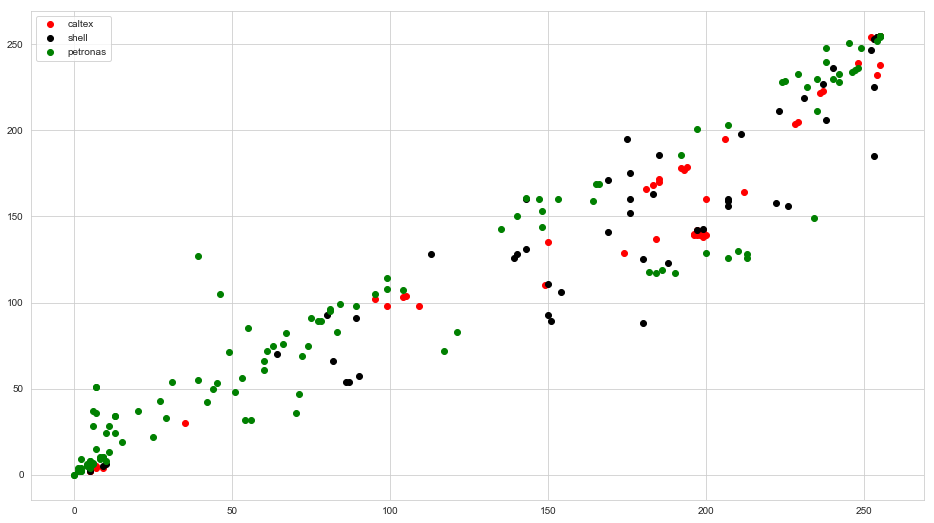

In [270]:
df = logos
target = df

points_1 = df[0:50].tolist()
points_2 = df[50:100].tolist()
points_3 = df[100:].tolist()

points_1 = np.array(points_1)
points_2 = np.array(points_2)
points_3 = np.array(points_3)

## Plot the data points to visualize 
plt.figure(figsize=(16,9))
plt.scatter(points_1[:,0],points_1[:,1],color='red',label='caltex')
plt.scatter(points_2[:,0],points_2[:,1],color='black',label='shell')
plt.scatter(points_3[:,0],points_3[:,1],color='green',label='petronas')
plt.legend()
plt.show()

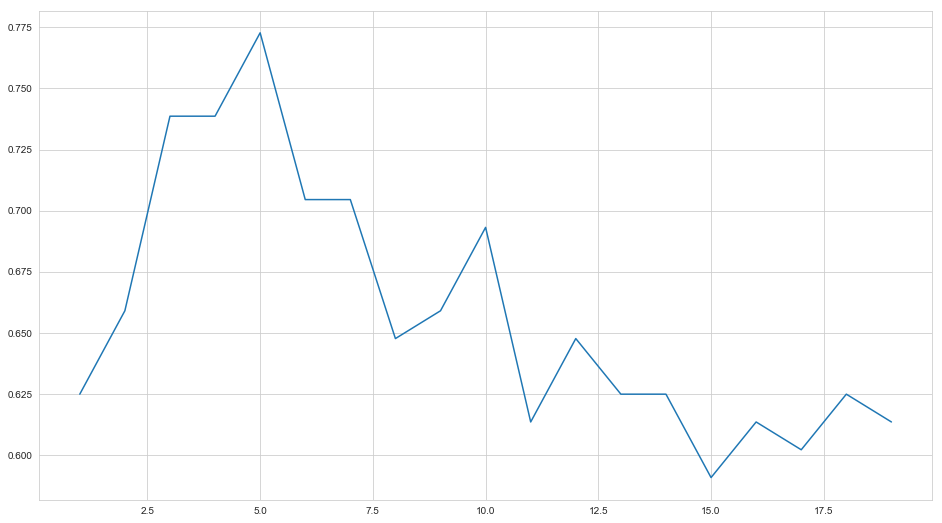

In [271]:
accuracy = []
for n in range(1,20):
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(trainRI,trainLabels)
    y_pred = clf.predict(testRI)
    accuracy.append(accuracy_score(testRL,y_pred))
## Plotting the accuracies for different values of K
plt.figure(figsize=(16,9))
plt.plot(range(1,20),accuracy)

In [274]:
# train and evaluate a k-NN classifer on the raw pixel intensities
print("[INFO] evaluating raw pixel accuracy...")
model = KNeighborsClassifier( n_neighbors = 1)
model.fit(trainRI, trainRL)
print("Training Accuracy : ", \
round(model.score(trainRI, trainRL) * 100, 2))
print("Testing Accuracy : ", \
round(model.score(testRI, testRL) * 100, 2))

[INFO] evaluating raw pixel accuracy...
Training Accuracy :  100.0
Testing Accuracy :  62.5


In [275]:
# train and evaluate a k-NN classifer on the raw pixel intensities
print("[INFO] evaluating raw pixel accuracy...")
model = KNeighborsClassifier( n_neighbors = 5)
model.fit(trainRI, trainRL)
print("Training Accuracy : ", \
round(model.score(trainRI, trainRL) * 100, 2))
print("Testing Accuracy : ", \
round(model.score(testRI, testRL) * 100, 2))

[INFO] evaluating raw pixel accuracy...
Training Accuracy :  85.5
Testing Accuracy :  77.27
